# PROBLEM STATEMENT

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on
    1. Time of purchase patterns (making sure last-minute purchases are expensive)
    2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and          hold back inventory for those expensive last-minute expensive purchases)
So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

# import necessary  libraries

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline

import warnings # Filtering warnings
warnings.filterwarnings('ignore')

# load the dataset

In [2]:
data= pd.read_excel('FlightDetails_Dataset.xlsx')

# check for shape of dataset

In [3]:
print('No. of Rows :',data.shape[0])
print('No. of Columns :',data.shape[1])
pd.set_option('display.max_columns',None)
data.head()

No. of Rows : 2222
No. of Columns : 12


,Unnamed: 0,Airline,Aeroplane,Class,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price
0,0,Air Asia,I5-338,(Economy),"Thu, 12 Jan 2023",20:35,22:15,Mumbai,Bangalore,Non Stop,1h 40m,2201
1,1,Air Asia,I5-1784,(Economy),"Thu, 12 Jan 2023",21:50,23:50,Mumbai,Bangalore,Non Stop,2h 00m,2201
2,2,IndiGo,6E-6571,(Economy),"Thu, 12 Jan 2023",23:10,00:45\n+ 1 day,Mumbai,Bangalore,Non Stop,1h 35m,2305
3,3,IndiGo,6E-5252,(Economy),"Thu, 12 Jan 2023",18:50,20:40,Mumbai,Bangalore,Non Stop,1h 50m,2549
4,4,Go First,G8-398,(Economy),"Thu, 12 Jan 2023",19:15,20:55,Mumbai,Bangalore,Non Stop,1h 40m,2551


Our dataset contains 2222 rows and 12 columns

In [4]:
# drop the unnecessary column 'Unnamed: 0'
data.drop(columns='Unnamed: 0', inplace =True)

In [5]:
# lets sort columns by their datatype using groupby method
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Price'], object: ['Airline', 'Aeroplane', 'Class', 'Date', 'Departure_Time', 'Arrival_Time', 'Source', 'Destination', 'Stops', 'Duration']}

only one feature 'Price' which is our target is a numerical feature, remaining all are categorical features.
Since our target variable is in numeric form it means that we have to predict prices by using different regression methods.

Also there are some features related to date and time which are showing object datatype. We have to convert them into datetime datetype 

# Checking for null values

In [6]:
data.isnull().sum().sum()

0

# Checking for duplicate entries

In [7]:
data.duplicated().sum().sum()

0

In [7]:
data.isin([' ','?','-','null','NA']).sum().any()

False

The above results shows that our dataset contains no missing values, no duplicate entries.

# Data Preprocessing

In [8]:
data['Duration'] = data['Duration'].map(lambda x : x.replace('05m','5m'))

In [9]:
# Conversion of Duration column from hr & Minutes format to Minutes
data['Duration'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# convert this column into a numeric datatypes
data['Duration']= pd.to_numeric(data['Duration'])

Since the feature 'Date' has day and date we have to seperate these into two differenr columns.
We will use lambda method here.

In [10]:
#first first 3 characters are showing day so here we will take only those 
data['Day']= data['Date'].map(lambda x :x[:3])

In [11]:
#the remaining characters are showing date of the flifgt so we will select only these characters now
data['Date']= data['Date'].map(lambda x :x[4:])

In [13]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Duration', 'Price'], object: ['Airline', 'Aeroplane', 'Class', 'Date', 'Departure_Time', 'Arrival_Time', 'Source', 'Destination', 'Stops', 'Day']}

# EDA for Categorical features

# Airline Disribution

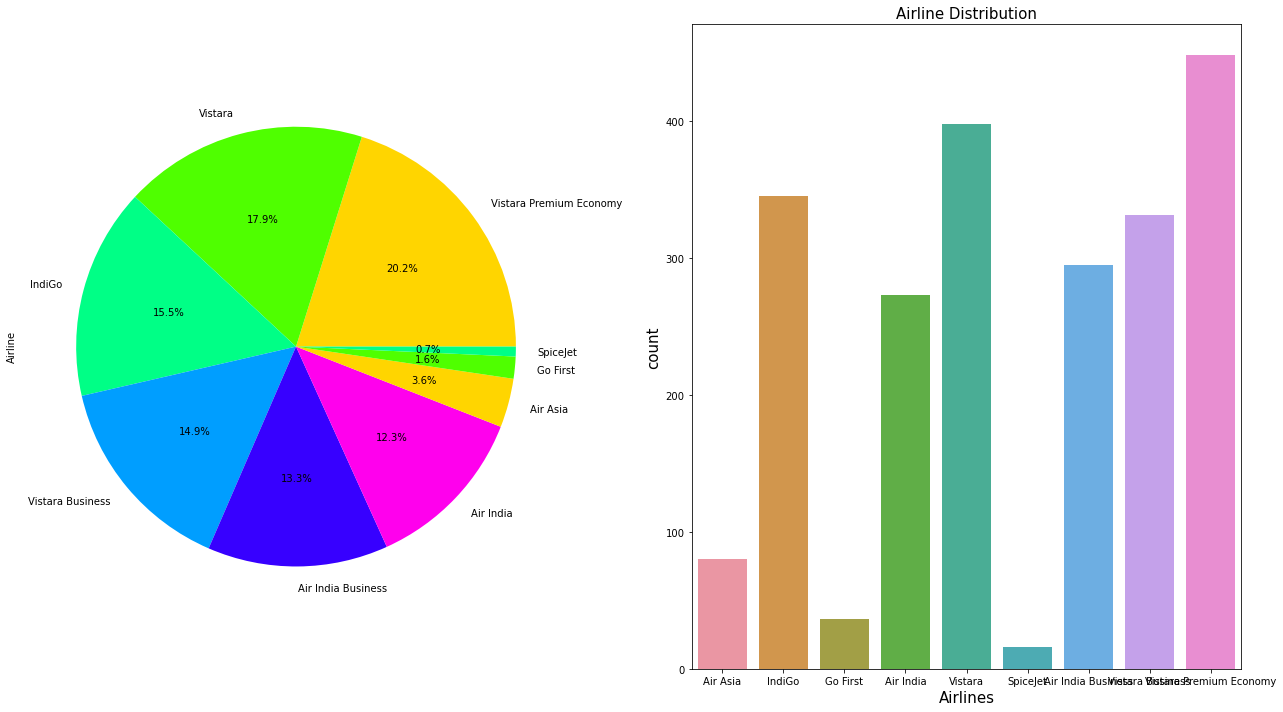

Vistara Premium Economy    448
Vistara                    398
IndiGo                     345
Vistara Business           331
Air India Business         295
Air India                  273
Air Asia                    80
Go First                    36
SpiceJet                    16
Name: Airline, dtype: int64

In [41]:
f,ax=plt.subplots(1,2,figsize=(18,10),facecolor='white')
data['Airline'].value_counts().plot(kind='pie',autopct='%3.1f%%',ax=ax[0])
plt.title('Airline Distribution')

sns.countplot('Airline',data=data,ax=ax[1])
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Airline Distribution',fontsize=15)

plt.show()
data['Airline'].value_counts()

Observation:
    1.We can see maximum number of flights are of Business Class.Maximum number of flights run by Vistara Premium Economy while       minimum Flights run by Spicejet.
    2.Around 28% of flights of Business Class.

# Classwise Distribution

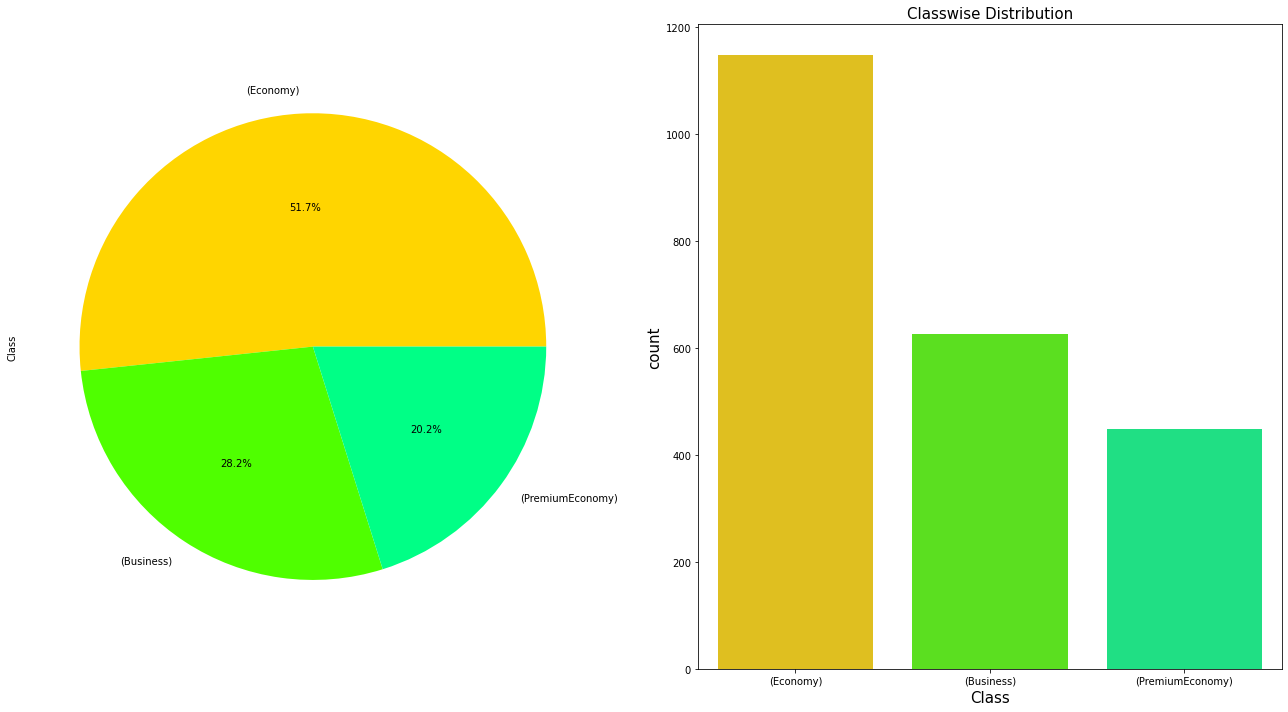

(Economy)           1148
(Business)           626
(PremiumEconomy)     448
Name: Class, dtype: int64

In [34]:
f,ax=plt.subplots(1,2,figsize=(18,10),facecolor='white')
data['Class'].value_counts().plot(kind='pie',autopct='%3.1f%%',ax=ax[0])
plt.title('Classwise Distribution')

sns.countplot('Class',data=data,ax=ax[1])
plt.xlabel('Class',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Classwise Distribution',fontsize=15)
plt.show()

data['Class'].value_counts()

Observation:
    1.51.7% flights are of Economy class, as they are low cost of flight & most of people prefer it.
    2.There are more business class flights than Premium Economy flights. It strange because Business class is costlier than           Premium Economy class.
   

# Stopwise Distribution

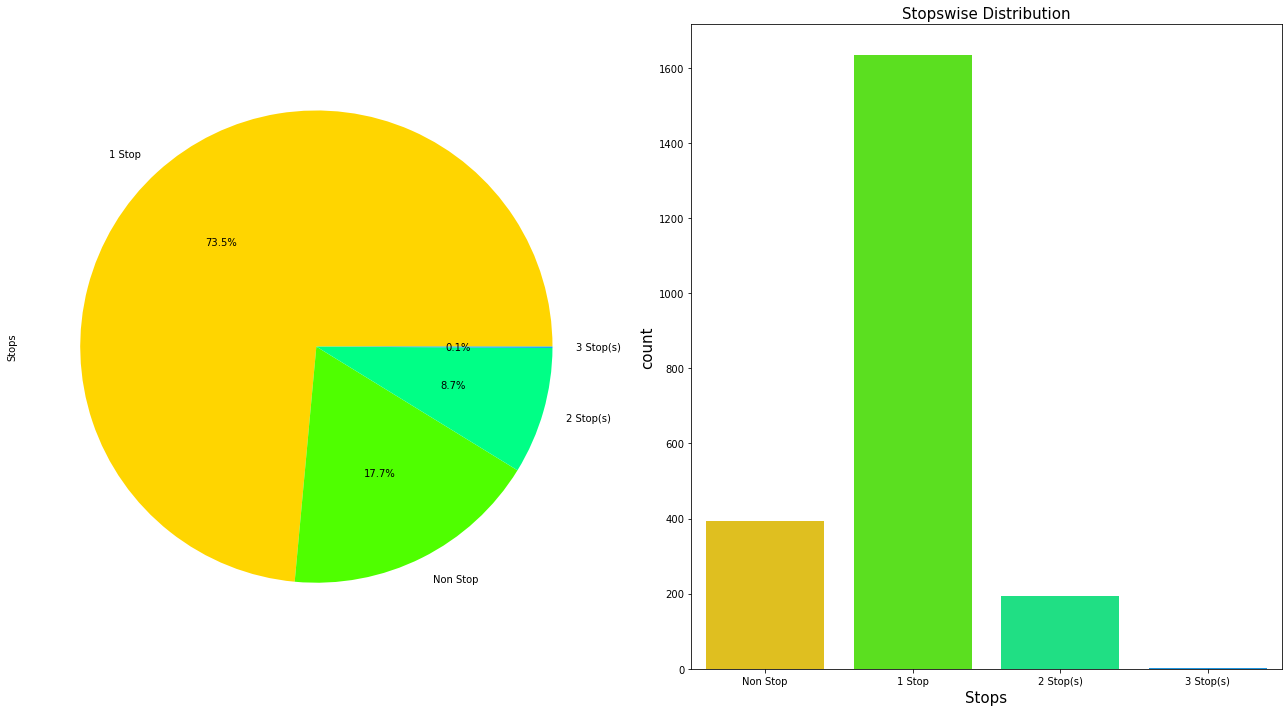

1 Stop       1634
Non Stop      393
2 Stop(s)     193
3 Stop(s)       2
Name: Stops, dtype: int64

In [36]:
f,ax=plt.subplots(1,2,figsize=(18,10),facecolor='white')
data['Stops'].value_counts().plot(kind='pie',autopct='%3.1f%%',ax=ax[0])
plt.title('Stopswise Distribution')

sns.countplot('Stops',data=data,ax=ax[1])
plt.xlabel('Stops',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Stopswise Distribution',fontsize=15)
plt.show()

data['Stops'].value_counts()

Observation:
    1. 73.5% flights take single stop in there way from Mumbai to Banglore.It is also possible that these flights may have high        flight duration compare to Non-stop Flight
    2. 17.7% of flights do not have any stop in there route.

# Daywise Distribution

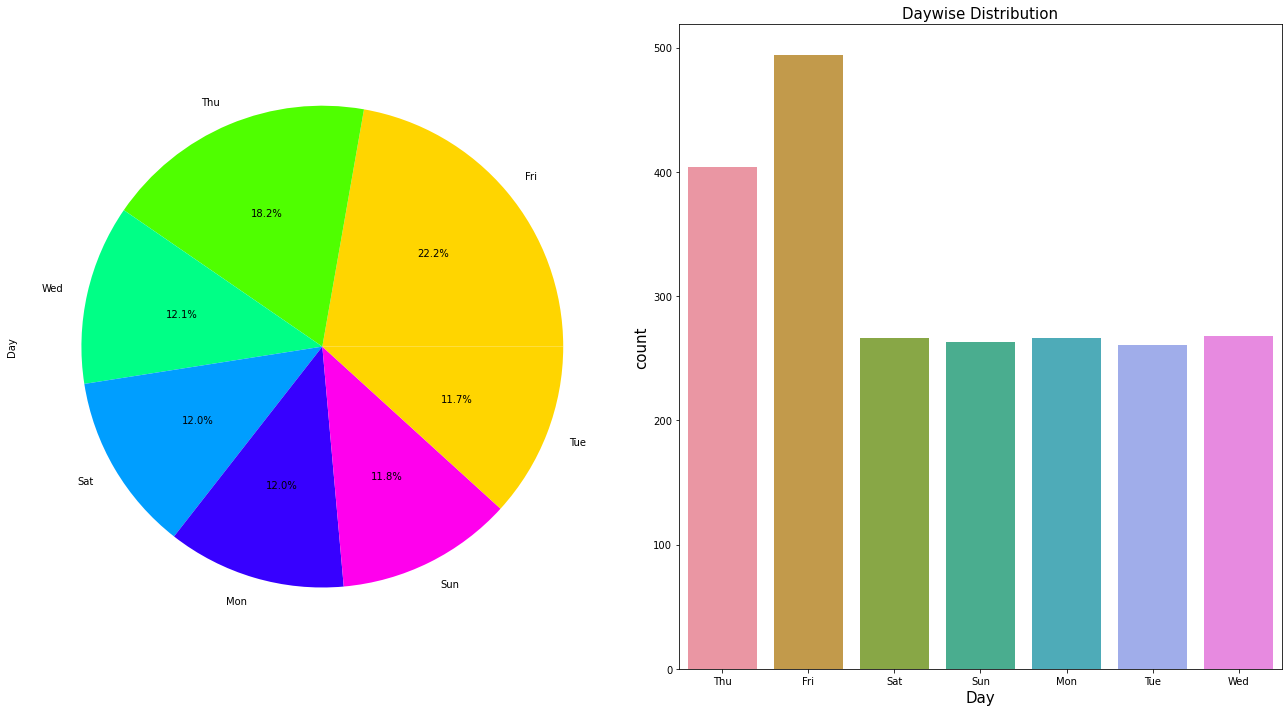

Fri    494
Thu    404
Wed    268
Sat    266
Mon    266
Sun    263
Tue    261
Name: Day, dtype: int64

In [37]:
f,ax=plt.subplots(1,2,figsize=(18,10),facecolor='white')
data['Day'].value_counts().plot(kind='pie',autopct='%3.1f%%',ax=ax[0])
plt.title('Daywise Distribution')

sns.countplot('Day',data=data,ax=ax[1])
plt.xlabel('Day',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Daywise Distribution',fontsize=15)
plt.show()

data['Day'].value_counts()

Observation:
    1.Maximum number flights runs on Friday where minimum number of flights runs on Tuesday
    

# Datewise Distribution

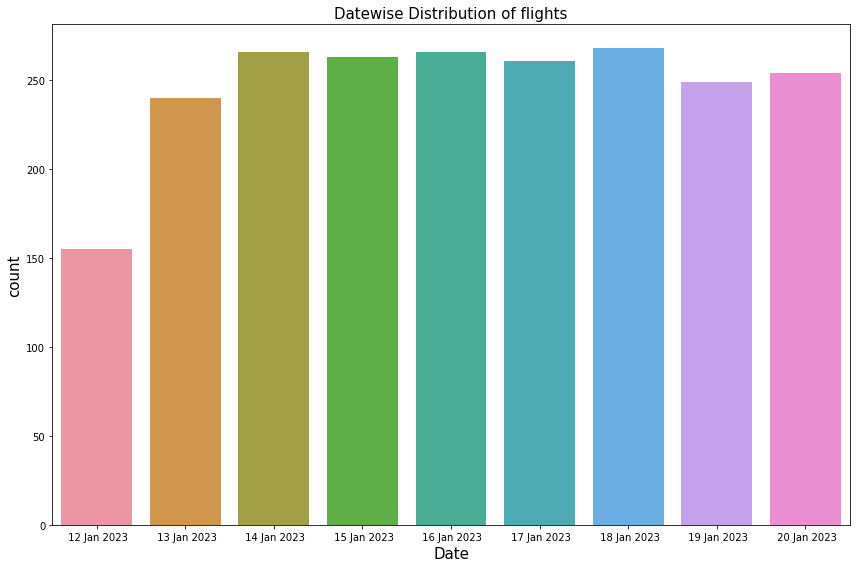

In [47]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot('Date',data=data)
plt.xlabel('Date',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Datewise Distribution of flights',fontsize=15)
plt.show()


Observation:
    1. Maximum number of flights are available on 18 Jan 2023 and minimum flights are available on 12 Jan 2023.

# Day vs Price

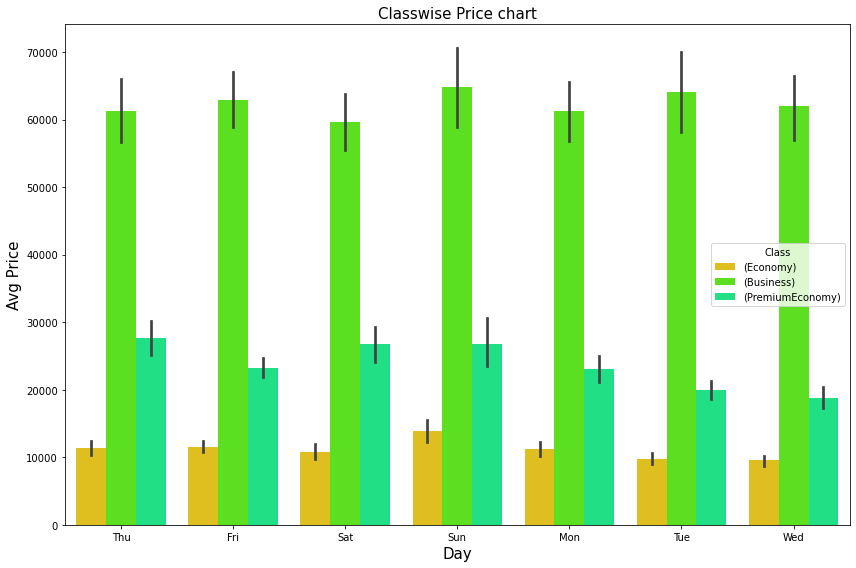

In [45]:
plt.figure(figsize=(12,8),facecolor='white')
sns.barplot(x='Day',y='Price',hue='Class',data=data)
plt.xlabel('Day',fontsize=15)
plt.ylabel('Avg Price',fontsize=15)
plt.title('Classwise Price chart',fontsize=15)
plt.show()


Observation:
    1. Maximum average price for Business class is for Sunday and minimum for saturday.
    2. Maximum average price for Economy class is for Sunday and minimum for Tuesday.
    3. Maximum average price for Premium Economy class is for Thursday and minimum for Wednesday.
   

# Class vs Duration

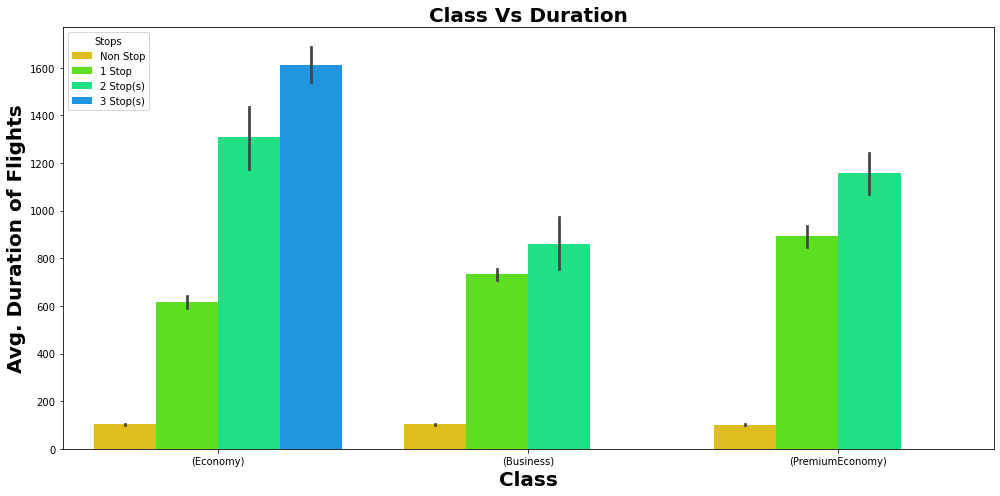

In [54]:
plt.figure(figsize =(14,7))
sns.barplot(x=data['Class'],y=data['Duration'],hue=data['Stops'])
plt.title("Class Vs Duration",fontsize=20,fontweight ='bold')
plt.xlabel('Class',fontsize = 20,fontweight ='bold')
plt.ylabel('Avg. Duration of Flights',fontsize = 20,fontweight ='bold')
plt.show()

Observation:
    As the number of stops increases the duration also increases.

# Airline vs Duration

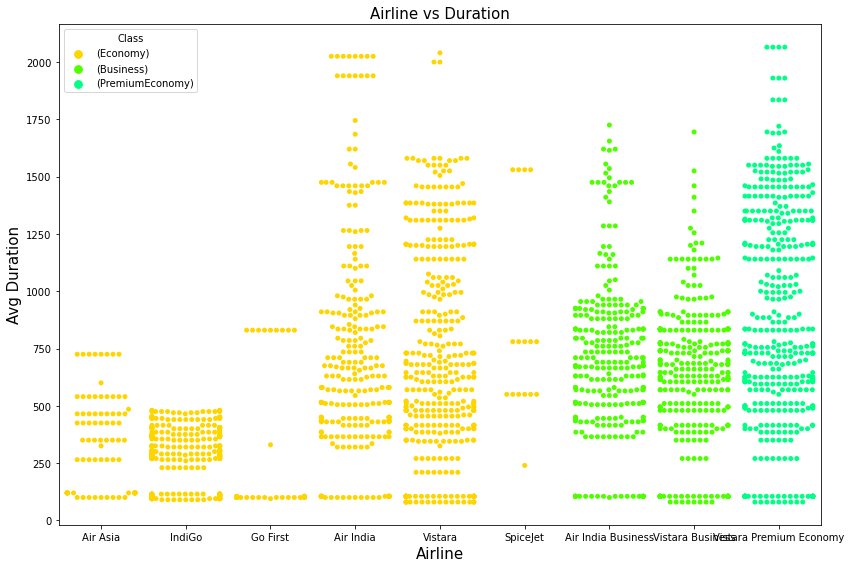

In [53]:
plt.figure(figsize=(12,8),facecolor='white')
sns.swarmplot(x='Airline',y='Duration',hue='Class',data=data)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Avg Duration',fontsize=15)
plt.title('Airline vs Duration',fontsize=15)
plt.show()

# Class vs Duration

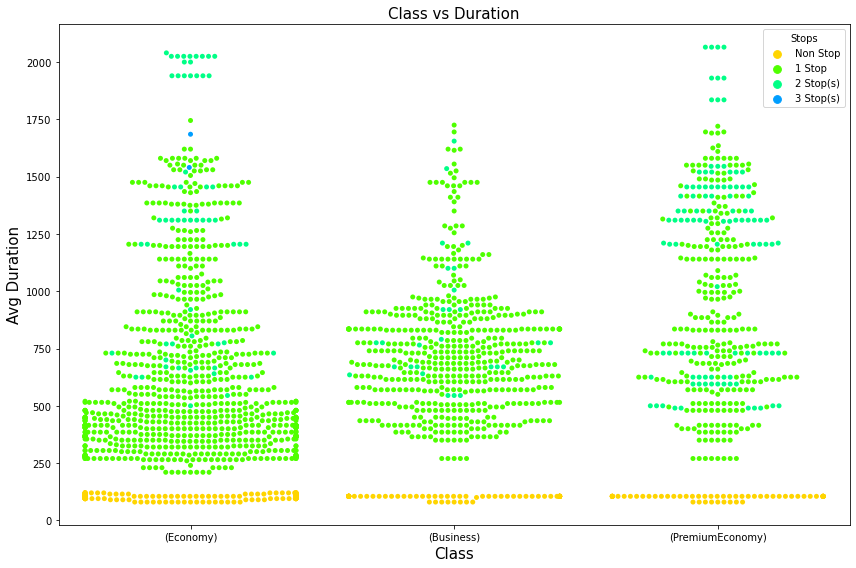

In [52]:
plt.figure(figsize=(12,8),facecolor='white')
sns.swarmplot(x='Class',y='Duration',hue='Stops',data=data)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Avg Duration',fontsize=15)
plt.title('Class vs Duration',fontsize=15)
plt.show()

# Price vs Stops

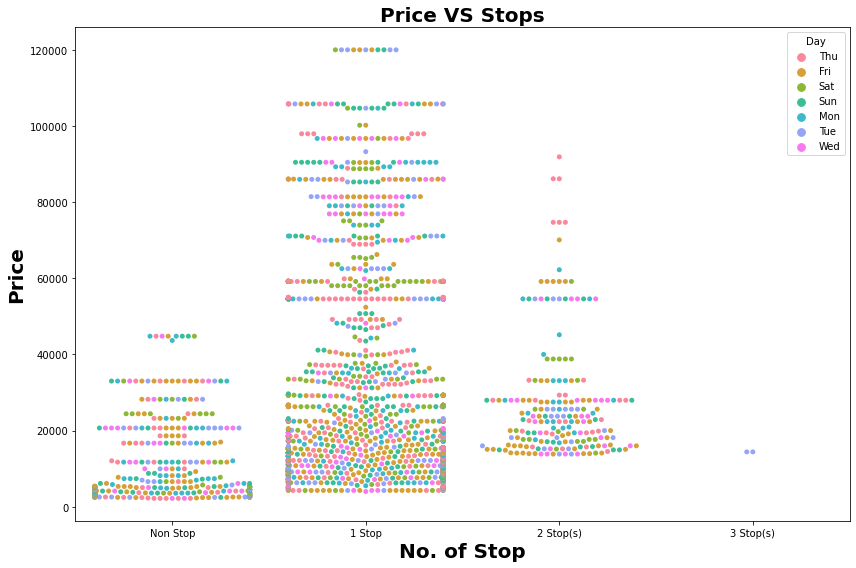

In [55]:
plt.figure(figsize =(12,8))
sns.swarmplot(y=data['Price'],x=data['Stops'], hue= data['Day'])
plt.title("Price VS Stops",fontsize=20,fontweight ='bold')
plt.xlabel('No. of Stop',fontsize = 20,fontweight ='bold')
plt.ylabel('Price',fontsize = 20,fontweight ='bold')
plt.show()

# Stops vs Duration

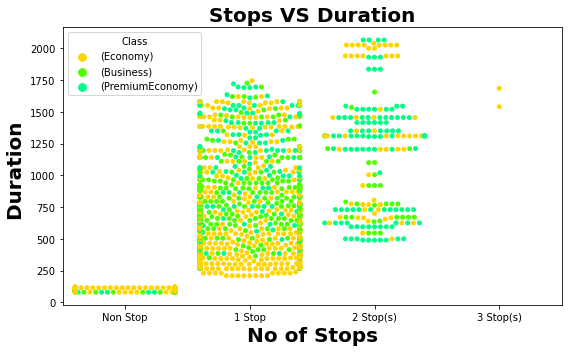

In [56]:
plt.figure(figsize =(8,5))
sns.swarmplot(y=data['Duration'],x=data['Stops'], hue =data['Class'])
plt.title("Stops VS Duration",fontsize=20,fontweight ='bold')
plt.xlabel('No of Stops',fontsize = 20,fontweight ='bold')
plt.ylabel('Duration ',fontsize = 20,fontweight ='bold')
plt.show()

# Feature Engineering

Since our dataset is all about flights from Mumbai to Banglore, we dont need the seperate features Source and Destination in our dataset. Also, the features Departure_Time and Arrival_Time are not so important. Hence we will drop these 4 features.

In [57]:
# Dropping unnecessary features
data.drop(columns=['Departure_Time','Arrival_Time','Source','Destination'], inplace= True)

Now sort the features by their datatypes

In [58]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Duration', 'Price'], object: ['Airline', 'Aeroplane', 'Class', 'Date', 'Stops', 'Day']}

In [59]:
cat_features = ['Airline', 'Class', 'Aeroplane', 'Date', 'Stops', 'Day']
num_features = ['Duration', 'Price']

Since the values in the feature Aeroplane contains '-' and '/', we have to remove them for further analysis.
Lets remove these using lambda function

In [60]:
data['Aeroplane']= data['Aeroplane'].map(lambda x: str(x).replace('-',''))
data['Aeroplane']= data['Aeroplane'].map(lambda x: str(x).replace('/',''))

# Label Encoding

In [61]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_features:
    data[i] =le.fit_transform(data[i])
data.head()

,Airline,Aeroplane,Class,Date,Stops,Duration,Price,Day
0,0,157,1,0,3,100,2201,4
1,0,150,1,0,3,120,2201,4
2,4,41,1,0,3,95,2305,4
3,4,19,1,0,3,110,2549,4
4,3,148,1,0,3,100,2551,4


# Outliers Detection

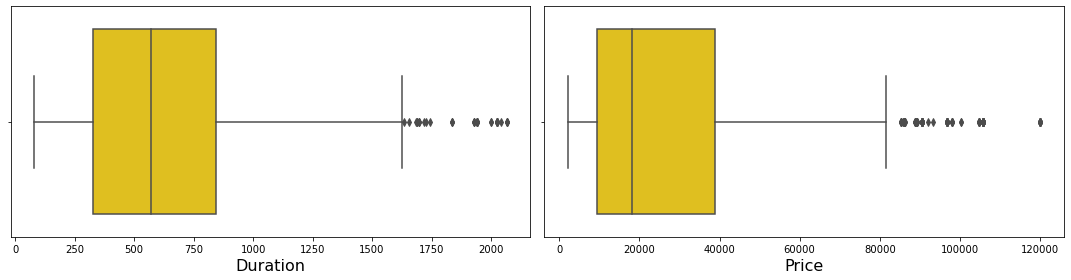

In [62]:
plt.figure(figsize=(15,4), facecolor ='white')
plotnumber = 1
for i in num_features:
    if plotnumber <= 2:
        ax = plt.subplot(1,2,plotnumber)
        sns.boxplot(data[i])
        plt.xlabel(i, fontsize= 16)
    plotnumber += 1
plt.show()

# Outliers Removal

From the above boxplot we can see that the outliers are present in features 'Duration' and 'Price'. But our data is realistic and error free we will not remove the outliers.

# Correlation

In [63]:
data.corr()

,Airline,Aeroplane,Class,Date,Stops,Duration,Price,Day
Airline,1.000000,0.692762,0.382680,-0.003446,-0.005208,0.155862,0.220013,-0.012279
Aeroplane,0.692762,1.000000,0.148898,-0.024126,-0.195349,0.283147,0.396268,0.003049
Class,0.382680,0.148898,1.000000,-0.017686,0.073324,0.123854,-0.582204,-0.007583
Date,-0.003446,-0.024126,-0.017686,1.000000,0.002851,-0.097860,-0.076437,0.176998
Stops,-0.005208,-0.195349,0.073324,0.002851,1.000000,-0.478762,-0.323949,-0.014401
Duration,0.155862,0.283147,0.123854,-0.097860,-0.478762,1.000000,0.184374,0.024281
Price,0.220013,0.396268,-0.582204,-0.076437,-0.323949,0.184374,1.000000,-0.004469
Day,-0.012279,0.003049,-0.007583,0.176998,-0.014401,0.024281,-0.004469,1.000000


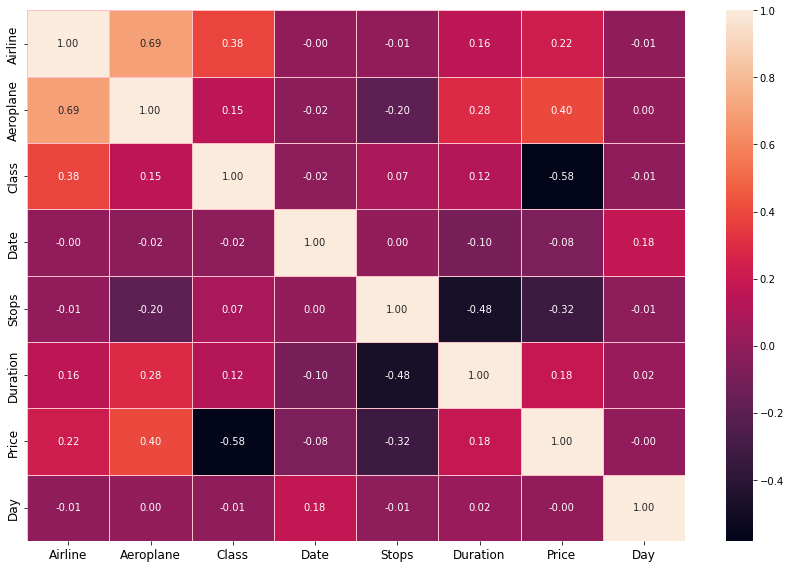

In [65]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt='0.2f',linewidth=0.5,linecolor='pink')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Correlation plot

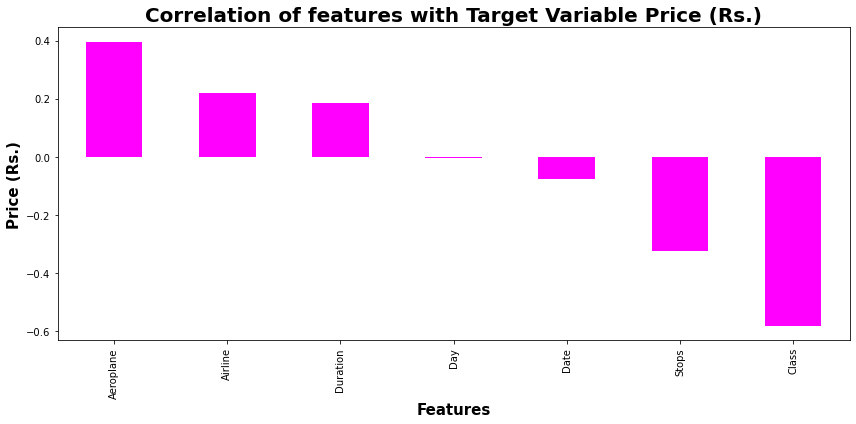

In [66]:
plt.figure(figsize = (12,6))
data.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price (Rs.)',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price (Rs.)',fontsize = 20,fontweight='bold')
plt.show()

# Skewness

In [67]:
data.skew()

Airline     -0.325128
Aeroplane   -0.105082
Class        0.106409
Date        -0.035468
Stops        1.500289
Duration     0.821471
Price        1.366630
Day          0.055225
dtype: float64

# Standard Scaling

In [68]:
# Splitting data in target(dependent variable) and features(independent variables)
X = data.drop(['Price'], axis=1)
Y = data['Price']

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# ML Model Building

# Splitting data into training and test dataset

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.3)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (1555, 7)
Training Target Vector Size : (1555,)
Test Feature Matrix Size: (667, 7)
Test Target Vector Size: (667,)


In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Finding Best Random State

In [78]:
maxR2_score=0
maxRS=0
for i in range(50,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.3)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    y_pred=lr.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.7079928855339241 on Random_state 366


# Linear Regression

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 366, test_size=0.3)
lr= LinearRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_lr))
print('Mean squared error :', mean_squared_error(Y_test, y_pred_lr))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred_lr)))
print('R2 Score_lr :',r2_score(Y_test,y_pred_lr)*100)
print('CV Score_lr :',cross_val_score(lr, X_scale, Y, cv=10).mean())

Mean absolute error : 11316.880252988574
Mean squared error : 202319273.08602673
Root Mean squared error : 14223.89795681995
R2 Score_lr : 70.79928855339242
CV Score_lr : -4.459568312889918


# Extra Trees Regressor

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 366, test_size=0.3)
ext = ExtraTreesRegressor()
ext.fit(X_train, Y_train)
y_pred_ext = ext.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_ext))
print('Mean squared error :', mean_squared_error(Y_test, y_pred_ext))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred_ext)))
print('R2 Score_ext :',r2_score(Y_test,y_pred_ext)*100)
print('CV Score_ext :',cross_val_score(ext, X_scale, Y, cv=10).mean())

Mean absolute error : 3970.71107946027
Mean squared error : 48079349.04292368
Root Mean squared error : 6933.927389504715
R2 Score_ext : 93.06071450075753
CV Score_ext : 0.20531465598490817


# Random Forest Regressor

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 366, test_size=0.3)
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_rf))
print('Mean squared error :', mean_squared_error(Y_test, y_pred_rf))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred_rf)))
print('R2 Score_rf :',r2_score(Y_test,y_pred_rf)*100)
print('CV Score_rf :',cross_val_score(rf, X_scale, Y, cv=10).mean())

Mean absolute error : 3723.8526836581714
Mean squared error : 41291618.334776916
Root Mean squared error : 6425.855455484267
R2 Score_rf : 94.04038669294454
CV Score_rf : 0.4316889418684208


# Decision Tree Regressor

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 366, test_size=0.3)
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_dt))
print('Mean squared error :', mean_squared_error(Y_test, y_pred_dt))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred_dt)))
print('R2 Score_dt :',r2_score(Y_test,y_pred_dt)*100)
print('CV Score_dt :',cross_val_score(dt, X_scale, Y, cv=10).mean())

Mean absolute error : 4367.607196401799
Mean squared error : 70655354.17091455
Root Mean squared error : 8405.67392723002
R2 Score_dt : 89.80232294317574
CV Score_dt : 0.10380831327204805


# XGB Regressor


In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 366, test_size=0.3)
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred_xgb = xgb.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_xgb))
print('Mean squared error :', mean_squared_error(Y_test, y_pred_xgb))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred_xgb)))
print('R2 Score_xgb :',r2_score(Y_test,y_pred_xgb)*100)
print('CV Score_xgb :',cross_val_score(xgb, X_scale, Y, cv=10).mean())

Mean absolute error : 3692.5184939268647
Mean squared error : 38099746.23646836
Root Mean squared error : 6172.499188859271
R2 Score_xgb : 94.50106913162429
CV Score_xgb : 0.48723279151304916


We can see that among all the models, XGB Regressor gives maximum R2 score of 94.501069 and maximum cross validation score 0.487232.Hemce, we will select XGB Regressor as final model and we will perform hyper parameter tuning over this model to enhance its R2 Score.

# Hyper Parameter Optimization

In [88]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=366, test_size=0.3)

In [89]:
parameter = {'n_estimators':[400,500],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[6,8],
              'eta' : [0.01, 0.1] }

In [90]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [91]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 1/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.924 total time=   0.3s
[CV 2/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 2/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.941 total time=   0.3s
[CV 3/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.918 total time=   0.3s
[CV 4/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.936 total time=   0.3s
[CV 5/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 5/5; 1/48] END boo

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'booster': ['gbtree', 'dart', 'gblinear'],
                         'eta': [0.01, 0.1], 'gamma': array([0. , 0.1]),
                         'max_depth': [6, 8], 'n_estimators': [400, 500]},
             verbose=10)

In [92]:
GCV.best_params_

{'booster': 'dart',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 6,
 'n_estimators': 400}

# Final Model

In [93]:
final_model=XGBRegressor(booster='gbtree', max_depth=6, eta=0.1,
                                gamma=0.1, n_estimators=400)
final_model.fit(X_train,Y_train)
pred=final_model.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 94.09917724102289
mean_squared_error: 40884283.70619134
mean_absolute_error: 3867.83636758281
RMSE value: 6394.081928329612


# Saving Model

In [94]:
# Saving the model using .pkl
import joblib
joblib.dump(final_model,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

# Test data Predictions

In [95]:
# Loading the saved model
model = joblib.load("Flight_Price_Prediction.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([ 89361.58  ,  30567.348 ,  14061.017 ,   3276.9106,  52000.566 ,
        30291.668 ,  12655.807 ,   8748.235 ,  19817.768 ,  28533.371 ,
         7953.494 ,  14233.467 ,  13510.894 ,  15420.029 , 106070.38  ,
        21355.66  ,  58565.387 ,   8565.034 ,  34740.37  ,  95060.375 ,
        69559.88  ,  15319.168 ,  18190.12  ,  11650.043 ,  18445.705 ,
        35278.496 ,  29162.148 ,  54213.543 ,  82848.766 ,   8133.9414,
        60793.445 ,  15687.813 ,  55774.41  ,  18716.404 ,  12285.343 ,
         6308.4404,  15831.147 ,  78237.125 ,  54490.5   ,   6596.8174,
         9662.767 ,  61131.797 ,   7046.7773,  22362.127 ,  12994.793 ,
         9958.394 ,  14842.933 ,   8557.739 ,  16784.607 ,   5816.155 ,
        21190.48  ,  13116.177 ,   2905.2336, 110034.94  ,  21748.89  ,
        80265.914 ,   5938.272 ,  22533.354 ,  25596.46  ,  28305.396 ,
        16958.982 ,  16570.35  ,  73737.31  ,  14622.711 ,   7204.0396,
        25766.746 ,  31447.33  ,  60951.38  ,  59197.848 ,  1951

In [96]:
pd.DataFrame([model.predict(X_test)[:], Y_test[:]], index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666
Predicted,89361.578125,30567.347656,14061.016602,3276.910645,52000.566406,30291.667969,12655.806641,8748.235352,19817.767578,28533.371094,7953.494141,14233.466797,13510.893555,15420.029297,106070.382812,21355.660156,58565.386719,8565.03418,34740.371094,95060.375,69559.882812,15319.167969,18190.119141,11650.042969,18445.705078,35278.496094,29162.148438,54213.542969,82848.765625,8133.941406,60793.445312,15687.813477,55774.410156,18716.404297,12285.342773,6308.44043,15831.147461,78237.125,54490.5,6596.817383,9662.766602,61131.796875,7046.777344,22362.126953,12994.792969,9958.393555,14842.932617,8557.739258,16784.607422,5816.154785,21190.480469,13116.176758,2905.233643,110034.9375,21748.890625,80265.914062,5938.271973,22533.353516,25596.460938,28305.396484,16958.982422,16570.349609,73737.3125,14622.710938,7204.039551,25766.746094,31447.330078,60951.378906,59197.847656,19517.949219,58997.304688,41832.789062,7880.709961,7011.700195,84715.882812,41858.867188,5441.692871,5168.779297,7922.289551,7161.512695,16017.697266,5648.160645,2475.624268,46939.289062,34636.878906,11291.68457,103884.726562,30021.314453,5901.712891,14655.380859,21811.507812,32598.652344,55015.820312,53488.0625,3260.737793,71127.429688,9275.12207,15778.897461,11127.208008,93101.226562,11596.988281,23856.482422,21761.882812,58396.003906,9745.47168,58139.011719,4931.101074,35074.359375,9518.256836,18048.515625,2815.333496,35509.441406,78565.28125,11750.564453